# Proyek Analisis Data: E-Commerce
- Nama: Hafiizh Taufiqul Hakim
- Email: 2012500720@student.budiluhur.ac.id
- Id Dicoding: hafizhtaufiqul1002
- Demo Streamlit: 

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana kita dapat mengukur tingkat kepuasan pelanggan dalam bentuk persentase?
- Pertanyaan 2: Bagaimana distribusi status pesanan pelanggan, seperti pesanan yang sedang diproses, pesanan dalam pengiriman, pesanan yang telah selesai, hingga pesanan yang mengalami pembatalan?
- Pertanyaan 3: Produk apa saja yang memiliki penjualan terbanyak dan rating terbaik?
- Pertanyaan 4: Kota mana saja yang memiliki penjualan terbanyak?

## Menyiapkan semua library yang dibutuhkan

In [70]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [71]:
# melihat versi dari setiap library

session_info.show()

## Data Wrangling

### Gathering Data

In [72]:
data_customer = pd.read_csv(r'C:\Users\Siswantoro\Documents\Hafiizh\Dicoding\Tugas\ProyekAkhir_AnalisisData\dataset\customers_dataset.csv')
data_geolocation = pd.read_csv(r'C:\Users\Siswantoro\Documents\Hafiizh\Dicoding\Tugas\ProyekAkhir_AnalisisData\dataset\geolocation_dataset.csv')
data_order_items = pd.read_csv(r'C:\Users\Siswantoro\Documents\Hafiizh\Dicoding\Tugas\ProyekAkhir_AnalisisData\dataset\order_items_dataset.csv')
data_order_payments = pd.read_csv(r'C:\Users\Siswantoro\Documents\Hafiizh\Dicoding\Tugas\ProyekAkhir_AnalisisData\dataset\order_payments_dataset.csv')
data_order_reviews = pd.read_csv(r'C:\Users\Siswantoro\Documents\Hafiizh\Dicoding\Tugas\ProyekAkhir_AnalisisData\dataset\order_reviews_dataset.csv')
data_orders = pd.read_csv(r'C:\Users\Siswantoro\Documents\Hafiizh\Dicoding\Tugas\ProyekAkhir_AnalisisData\dataset\orders_dataset.csv')
data_product_category_name = pd.read_csv(r'C:\Users\Siswantoro\Documents\Hafiizh\Dicoding\Tugas\ProyekAkhir_AnalisisData\dataset\product_category_name_translation.csv')
data_products = pd.read_csv(r'C:\Users\Siswantoro\Documents\Hafiizh\Dicoding\Tugas\ProyekAkhir_AnalisisData\dataset\products_dataset.csv')
data_sellers = pd.read_csv(r'C:\Users\Siswantoro\Documents\Hafiizh\Dicoding\Tugas\ProyekAkhir_AnalisisData\dataset\sellers_dataset.csv')

In [73]:
data_products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
28217,c4282015d858b8d5c14c1ec6b9000664,moveis_decoracao,46.0,1195.0,3.0,850.0,40.0,36.0,28.0
5801,0fb1658e227645b2fe14d8ba74d48606,informatica_acessorios,59.0,2338.0,1.0,3450.0,52.0,17.0,22.0
4302,a710be5818329b097a82bb26b480f5fa,esporte_lazer,53.0,826.0,6.0,367.0,19.0,14.0,17.0
6351,0c8b6b6e4f9ee5fe2c48d6cee4c69bc8,sinalizacao_e_seguranca,51.0,742.0,2.0,9350.0,55.0,55.0,22.0
6533,f5ea43ddacb6538655583a8f51a12799,relogios_presentes,54.0,345.0,4.0,1650.0,42.0,10.0,42.0


In [74]:
data_product_category_name.sample(5)

,product_category_name,product_category_name_english
14,brinquedos,toys
31,market_place,market_place
6,perfumaria,perfumery
25,construcao_ferramentas_construcao,construction_tools_construction
58,bebidas,drinks


In [75]:
data_order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
30374,44f656d7fbb37d161491617473307a59,1,3570caaeaa3f5a1ae76392bb2b4155f9,7008613ea464bad5cb9b83456e1e6a8f,2017-09-08 14:44:56,58.00,46.94
75606,ac284fb15053d666dfb6128354f0e662,1,cde7eb02af6868b9904f1ea2c7fdfdc3,b19c48688808720822399ffa9f2dbe2f,2018-08-28 14:25:19,959.99,24.82
26674,3caf494d4c5d2bd8d542138e316ad680,1,6413f7a28e149a324c4a914000399fb2,7a67c85e85bb2ce8582c35f2203ad736,2018-05-10 22:35:19,131.99,18.19
30233,44a95b47b4bdb74a2bb1b947e9070e2a,1,8ced2631a18d2e0814557875b3bb907b,391fc6631aebcf3004804e51b40bcf1e,2017-08-14 07:35:14,49.95,11.85
32564,49d10d709e14496d0d1d8d6cb556d2f3,1,69455f41626a745aea9ee9164cb9eafd,58f1a6197ed863543e0136bdedb3fce2,2018-07-03 19:18:25,139.00,14.31


In [76]:
data_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
80561,4de273e695a489841193c7a5bd6911cd,cbb2359424abfe3190e892223a27b650,delivered,2017-10-17 14:31:02,2017-10-17 14:49:48,2017-10-18 20:48:38,2017-10-20 21:25:22,2017-10-27 00:00:00
8322,017c16deefc1868a33a5966485ea4721,e7e0438494f6fd05d28210e8c6bd02a6,delivered,2017-11-18 20:23:35,2017-11-18 20:46:08,2017-11-22 17:38:40,2017-12-01 22:26:43,2017-12-19 00:00:00
61417,81e8e3e73614d2d9f9a6807acc7d87b0,527517d6ff823aecd0c4c8466c69b614,delivered,2018-04-16 13:25:06,2018-04-16 14:33:04,2018-04-23 20:36:36,2018-04-25 21:56:41,2018-06-01 00:00:00
78601,6fd7aad38ed11be7812e861b8947f7d4,82becb9786935b5880aad883239d6f98,delivered,2018-08-08 13:12:51,2018-08-09 03:45:26,2018-08-09 13:02:00,2018-08-13 18:03:04,2018-08-22 00:00:00
33735,6e53f3d94a384e3e000da1b6d43641ab,e8513735b55502a0440356ac982fad51,delivered,2018-08-06 16:45:06,2018-08-06 17:04:38,2018-08-09 00:28:00,2018-08-09 20:24:26,2018-08-14 00:00:00


In [77]:
data_order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
40903,4d42f6d60736c9bed90c9d8b1720629f,7d6fc7e3467ea55ab94ed77b704554fb,4,NaN,NaN,2018-08-11 00:00:00,2018-08-14 21:05:43
11360,a07f0fdc4a5f1150bd7b348dd597828d,500a19c31220931934fc4d5bacf15fb9,5,NaN,NaN,2018-01-19 00:00:00,2018-01-19 21:52:41
62989,d360152275bd1b51a0dbb80153801ce2,20e0bf03acd50798a06ce8a2d8ff65e5,5,produto muito bom,produto entregue no prazo combinado.,2018-05-15 00:00:00,2018-05-21 13:46:01
18468,57243031612bff1f8dacfc5f0368fec5,1ebf075fd032885ad39a842a35c72fe7,5,Otimo,NaN,2018-08-01 00:00:00,2018-08-02 09:23:43
19720,31a6c50e4f65e71ffb6c99f31bdaca26,5ad82a9fb12ff34f8883ccfaddf3da4f,1,NaN,meu pedido nao veio comprei dois relogio branc...,2017-11-01 00:00:00,2017-12-20 15:01:20


In [78]:
data_sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2746,a1043bafd471dff536d0c462352beb48,37175,ilicinea,MG
2742,60ad151920c4f6f3ebbe8cfdf6166779,6322,carapicuiba,SP
401,38f276ca6e7cc95a6d1bb55ac9e5550f,17520,marilia,SP
1155,8d899e15a5925f097cca50faa49b15e3,18131,sao roque,SP
1778,1bb3812d5f0747a3ab7348f199001a10,4708,sao paulo,SP


In [79]:
data_merge = pd.merge(
    left=data_products,
    right=data_product_category_name,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [80]:
data_merge = pd.merge(
    left=data_merge,
    right=data_order_items,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

In [81]:
data_merge = pd.merge(
    left=data_merge,
    right=data_orders,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [82]:
data_merge = pd.merge(
    left=data_merge,
    right=data_order_reviews,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [83]:
data_merge = pd.merge(
    left=data_merge,
    right=data_sellers,
    how="inner",
    left_on="seller_id",
    right_on="seller_id"
)

In [84]:
data_merge.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
54653,02fbee632a2044d48ab16d57eec4db58,cama_mesa_banho,53.0,230.0,1.0,1017.0,39.0,15.0,34.0,bed_bath_table,...,2018-02-26 00:00:00,ed9b4fdced4a66ff16756b7df079234b,1,NaN,Produto ainda não foi entregue,2018-02-28 00:00:00,2018-02-28 08:51:55,14940,ibitinga,SP
60371,0c80d4d910506b4e1db996ff1fa5c658,moveis_decoracao,61.0,157.0,9.0,3450.0,41.0,15.0,25.0,furniture_decor,...,2018-02-09 00:00:00,e4b02fdcd67af08618a36da2d07f1488,3,NaN,Demorou muito para entregar,2018-02-10 00:00:00,2018-02-13 23:10:57,14940,ibitinga,SP
19387,49e15e6133b2f4e4fccb783a8e716707,telefonia,45.0,365.0,2.0,100.0,19.0,4.0,11.0,telephony,...,2018-03-01 00:00:00,dc9cd9ffbb22d596653850565801c5f1,5,NaN,NaN,2018-02-23 00:00:00,2018-02-26 10:18:38,3569,sao paulo,SP
45055,d285360f29ac7fd97640bf0baef03de0,relogios_presentes,46.0,501.0,4.0,363.0,18.0,13.0,13.0,watches_gifts,...,2018-08-14 00:00:00,edbd8fba019731c0479902afa66fa24c,5,NaN,NaN,2018-08-03 00:00:00,2018-08-05 04:42:19,13101,campinas,SP
93188,0603d2d85bcc46beb11bd247870c4841,cama_mesa_banho,30.0,66.0,1.0,1450.0,55.0,14.0,43.0,bed_bath_table,...,2018-02-05 00:00:00,425b486c27755495bf006b71e804a076,5,NaN,NaN,2018-01-24 00:00:00,2018-01-25 12:39:34,3333,sao paulo,SP


**Observasi:**  
Saya menggabungkan 6 dataset untuk dapat dianalisa lebih lanjut. 

dataset yang saya gunakan sebagai berikut:
- data_products
- data_product_category_name
- data_order_items
- data_orders
- data_order_reviews
- data_sellers

### Assessing Data

In [85]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     110750 non-null  object 
 1   product_category_name          110750 non-null  object 
 2   product_name_lenght            110750 non-null  float64
 3   product_description_lenght     110750 non-null  float64
 4   product_photos_qty             110750 non-null  float64
 5   product_weight_g               110749 non-null  float64
 6   product_length_cm              110749 non-null  float64
 7   product_height_cm              110749 non-null  float64
 8   product_width_cm               110749 non-null  float64
 9   product_category_name_english  110750 non-null  object 
 10  order_id                       110750 non-null  object 
 11  order_item_id                  110750 non-null  int64  
 12  seller_id                     

##### Missing Value

In [86]:
data_merge.isna().sum()

product_id                           0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     1
product_length_cm                    1
product_height_cm                    1
product_width_cm                     1
product_category_name_english        0
order_id                             0
order_item_id                        0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1145
order_delivered_customer_date     2293
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title     

**Observasi:**  
Terdapat missing value pada dataset, sehingga perlu dilakukan cleanning data

##### Duplicated

In [87]:
data_merge.duplicated().sum()

0

**Observasi:**  
Tidak terdapat Duplicated pada dataset, sehingga tidak perlu dilakukan cleaning data

##### Outlier

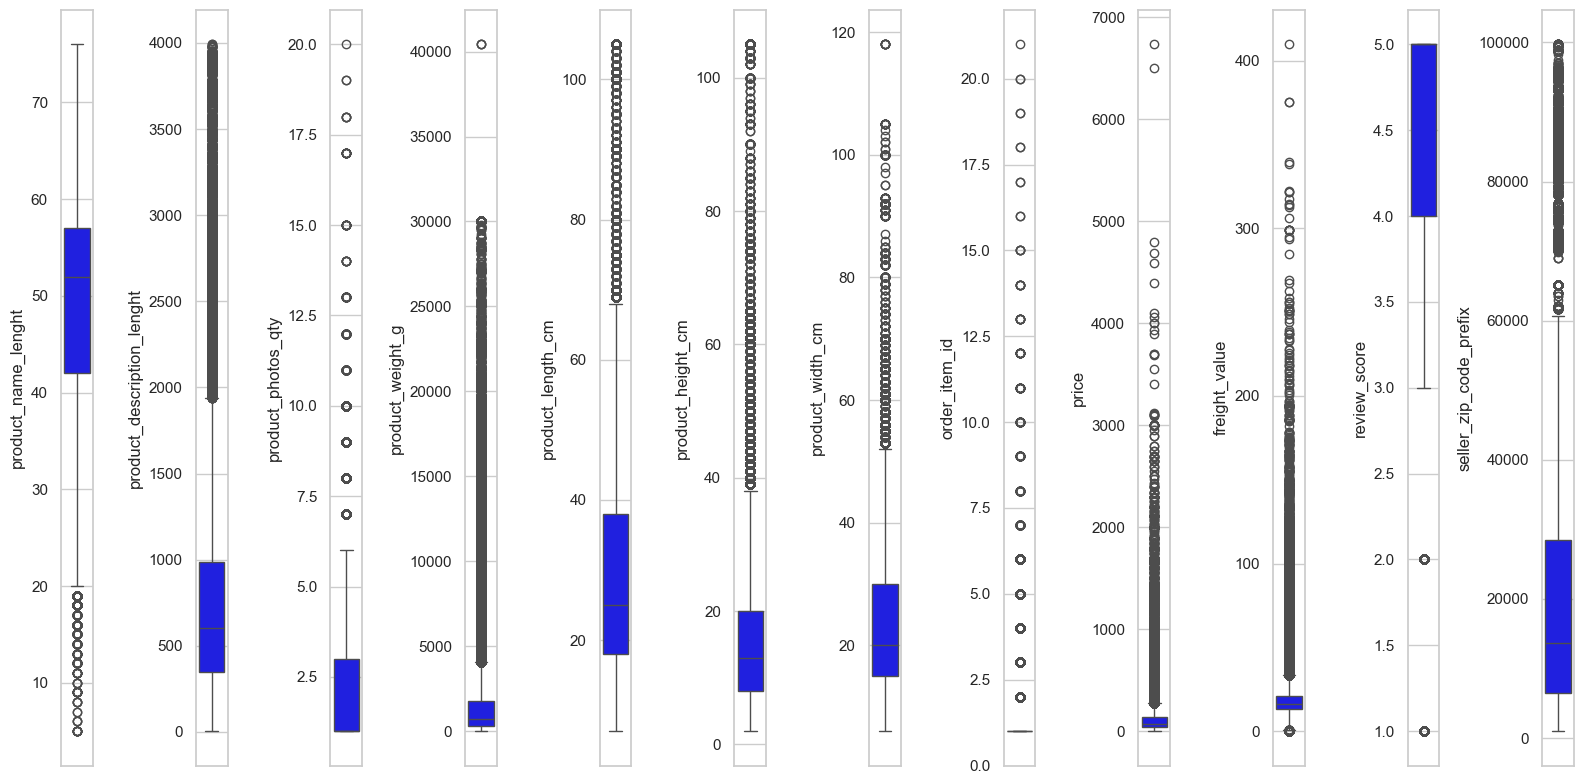

In [88]:
num_outlier = data_merge.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(16, 8))
for i in range(0,len(num_outlier)):
    plt.subplot(1, len(num_outlier), i+1)
    sns.boxplot(y=data_merge[num_outlier[i]], color='blue')
    plt.tight_layout()

**Observasi:**  
Terdapat banyak data yang mengalami outliers, sehingga perlu dilakukan cleaning data

### Cleaning Data

##### Missing Value

In [89]:
data_merge.isna().sum()

product_id                           0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     1
product_length_cm                    1
product_height_cm                    1
product_width_cm                     1
product_category_name_english        0
order_id                             0
order_item_id                        0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1145
order_delivered_customer_date     2293
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title     

In [90]:
# Handle Missing Value untuk Tipe data object

cat_missing_value = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_comment_title', 'review_comment_message']

for col in cat_missing_value:
    data_merge[col].fillna(data_merge[col].mode()[0], inplace=True)

In [91]:
# Handle Missing Value untuk Tipe data numeric

num_missing_value = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for col in num_missing_value:
    data_merge[col].fillna(data_merge[col].mean(), inplace=True)

In [92]:
data_merge.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timest

**Observasi:**  
- Menggunakan fillna() untuk mengganti nilai yang missing value dengan nilai tertentu. 
- Menggunakan mode() untuk nilai yang bertipe data kategorik
- Menggunakan mean() untuk nilai yang bertipe data numerik

##### Outlier

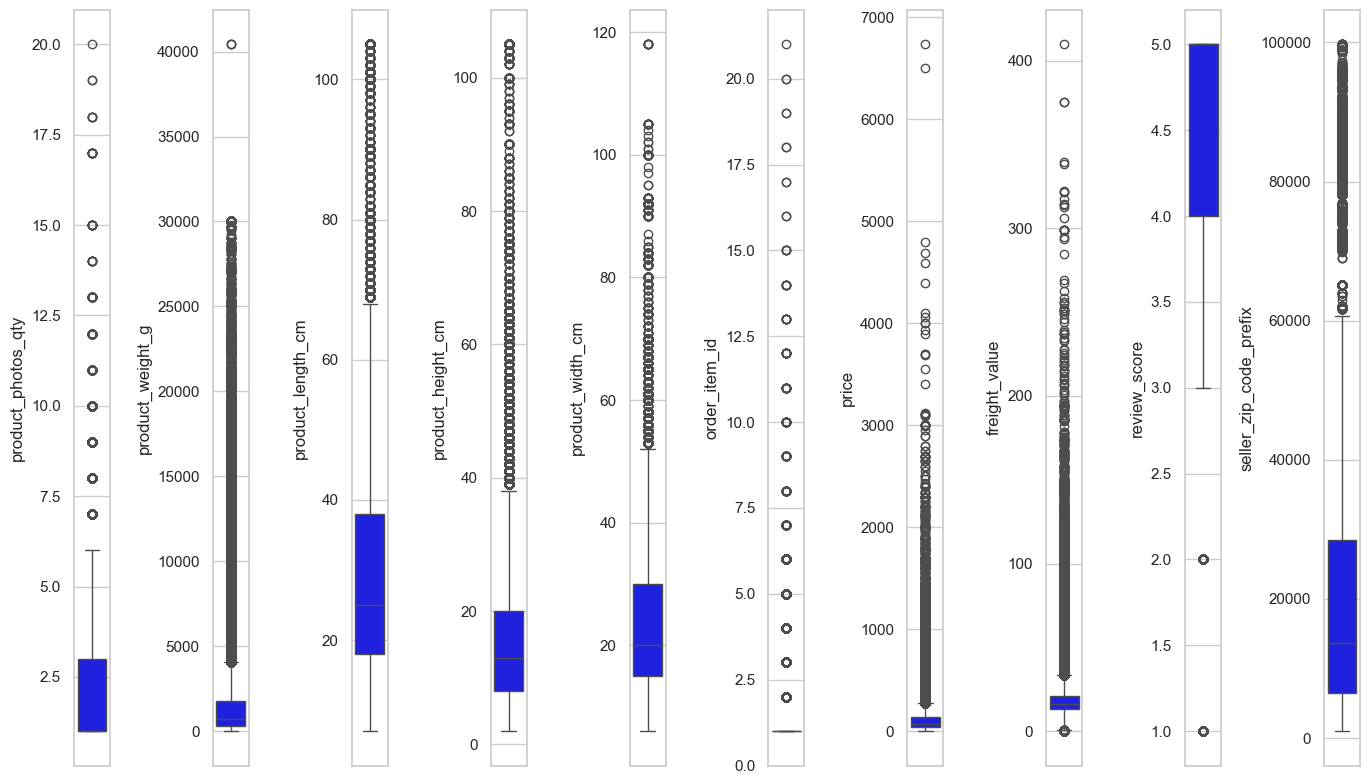

In [93]:
num_outlier = data_merge.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(16, 8))
for i in range(2,len(num_outlier)):
    plt.subplot(1, len(num_outlier), i+1)
    sns.boxplot(y=data_merge[num_outlier[i]], color='blue')
    plt.tight_layout()

In [94]:
# Handling outliers dengan IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(data_merge[num_outlier])}')

for col in data_merge[num_outlier]:
    Q1 = data_merge[col].quantile(0.25)
    Q3 = data_merge[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)

    filtered_ouliers = ((data_merge[col] >= lower_limit) & (data_merge[col] <= upper_limit))

data_clean = data_merge[filtered_ouliers]

print('Jumlah baris setelah memfilter outlier', len(data_clean))

Jumlah baris sebelum memfilter outlier: 110750
Jumlah baris setelah memfilter outlier 93580


**Observasi:**  
- Menggunakan metode IQR untuk melakukan handle outlier
- Jumlah baris sebelum memfilter outlier terdapat 110750, kemudian jumlah baris berkurang menjadi 93580. karena metode IQR menghapus seluruh baris yang mengalamin outlier.

## Exploratory Data Analysis (EDA)

In [95]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93580 entries, 0 to 110746
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     93580 non-null  object 
 1   product_category_name          93580 non-null  object 
 2   product_name_lenght            93580 non-null  float64
 3   product_description_lenght     93580 non-null  float64
 4   product_photos_qty             93580 non-null  float64
 5   product_weight_g               93580 non-null  float64
 6   product_length_cm              93580 non-null  float64
 7   product_height_cm              93580 non-null  float64
 8   product_width_cm               93580 non-null  float64
 9   product_category_name_english  93580 non-null  object 
 10  order_id                       93580 non-null  object 
 11  order_item_id                  93580 non-null  int64  
 12  seller_id                      93580 non-null  obj

In [96]:
cat = data_clean.select_dtypes(include=['object']).columns.tolist()
num = data_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

**Observasi:**  
Membuat pengelompokan berdasarkan tipe data numerik dan kategorik agar dapat mempermudah melakukan analisis data

##### Mengeksplorasi Parameter Statistik

In [97]:
# Metode describe() untuk data yang bertipe kategorik

data_clean[cat].describe()

,product_id,product_category_name,product_category_name_english,order_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_city,seller_state
count,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580,93580
unique,26570,71,71,81503,2262,77739,81503,7,81090,75484,67300,79183,443,81404,3915,30173,624,81278,389,10
top,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,bed_bath_table,5a3b1c29a49756e75f1ef513383c0c12,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20 00:00:00,e8236fe7b6e1bdd513a500de361e2b87,Recomendo,Muito bom,2017-12-19 00:00:00,2017-07-30 14:19:07,sao paulo,SP
freq,524,10286,10286,22,2020,22,22,91598,22,35,1018,2005,524,21,82602,53775,432,21,27646,78687


In [98]:
# Menggunakan metode describe() untuk data yang bertipe numerik

data_clean[num].describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value,review_score,seller_zip_code_prefix
count,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000,93580.000000
mean,48.895309,774.217557,2.227944,2113.875155,30.028190,16.552928,23.279515,1.200524,115.860476,19.257272,4.023146,13402.199904
std,9.946923,647.542429,1.730013,3769.221970,15.673965,13.638723,11.777088,0.705129,178.711452,15.104995,1.391744,10058.736641
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.850000,0.000000,1.000000,1001.000000
25%,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,39.000000,12.690000,4.000000,5141.000000
50%,52.000000,591.000000,2.000000,700.000000,25.000000,13.000000,20.000000,1.000000,69.900000,15.880000,5.000000,13170.000000
75%,57.000000,956.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,129.900000,20.190000,5.000000,14940.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,21.000000,6735.000000,375.280000,5.000000,60741.000000


In [99]:
# Menggunakan metode corr() untuk memeriksa korelasi antar data numerik

data_clean[num].corr()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value,review_score,seller_zip_code_prefix
product_name_lenght,1.000000,0.077151,0.157738,0.009604,0.062056,-0.036213,0.058908,-0.021284,0.012958,0.018647,-0.006972,-0.017243
product_description_lenght,0.077151,1.000000,0.108513,0.055872,-0.015678,0.075912,-0.081569,-0.009354,0.192724,0.089480,0.009803,0.062148
product_photos_qty,0.157738,0.108513,1.000000,0.000274,0.019331,-0.047546,-0.021649,-0.055200,0.046581,0.007356,0.019299,-0.069707
product_weight_g,0.009604,0.055872,0.000274,1.000000,0.457546,0.589986,0.498532,0.005050,0.327389,0.619752,-0.035415,0.052578
product_length_cm,0.062056,-0.015678,0.019331,0.457546,1.000000,0.202565,0.556731,0.015827,0.133344,0.303955,-0.029388,0.008833
product_height_cm,-0.036213,0.075912,-0.047546,0.589986,0.202565,1.000000,0.273884,0.039466,0.218138,0.392983,-0.033376,-0.002437
product_width_cm,0.058908,-0.081569,-0.021649,0.498532,0.556731,0.273884,1.000000,-0.004436,0.168108,0.330388,-0.015394,0.068813
order_item_id,-0.021284,-0.009354,-0.055200,0.005050,0.015827,0.039466,-0.004436,1.000000,-0.059440,-0.017888,-0.133298,-0.021138
price,0.012958,0.192724,0.046581,0.327389,0.133344,0.218138,0.168108,-0.059440,1.000000,0.395060,-0.004074,0.096161
freight_value,0.018647,0.089480,0.007356,0.619752,0.303955,0.392983,0.330388,-0.017888,0.395060,1.000000,-0.045826,0.149131


**Observasi:**  
- Menggunakan describe() dan corr() untuk melihat korelasi dan distribusi data numerik

##### Mengelompokan Data

In [100]:
# product dengan penjualan terbanyak dan memiliki rating terbaik

best_product = data_clean.groupby(by='product_category_name_english').agg({'order_id': 'count',
                                                                          'review_score': 'mean'}).reset_index()

best_product = best_product.sort_values(by=['order_id', 'review_score'], ascending=[False, False]).head(10).reset_index()

In [101]:
best_product

,index,product_category_name_english,order_id,review_score
0,7,bed_bath_table,10286,3.903072
1,43,health_beauty,7914,4.136341
2,39,furniture_decor,6976,3.873280
3,65,sports_leisure,6397,4.070345
4,49,housewares,5866,4.015172
5,70,watches_gifts,5490,4.006557
6,15,computers_accessories,5452,3.951394
7,68,telephony,4311,3.943401
8,42,garden_tools,3896,4.036961
9,5,auto,3704,4.071814


In [102]:
# Kota dengan penjualan terbanyak

best_seller = data_clean.groupby(by='seller_city').agg({'order_id': 'count'}).reset_index()
best_seller = best_seller.sort_values(by='order_id', ascending=False).head(10).reset_index()

In [103]:
best_seller

,index,seller_city,order_id
0,325,sao paulo,27646
1,142,ibitinga,7764
2,304,santo andre,3000
3,322,sao jose do rio preto,2564
4,45,belo horizonte,2500
5,287,rio de janeiro,2364
6,280,ribeirao preto,2239
7,137,guarulhos,1980
8,256,piracicaba,1908
9,161,itaquaquecetuba,1652


**Observasi:**  
Membuat pengelompokan data sebagai berikut:
- Produk dengan penjualan terbanyak dan rating tertinggi menggunakan kolom 'product_category_name_english', order_id, dan 'review_score'
- Kota dengan penjualan terbanyak menggunakan kolom 'seller_city', dan 'order_id'

## Visualization & Explanatory Analysis

In [104]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93580 entries, 0 to 110746
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     93580 non-null  object 
 1   product_category_name          93580 non-null  object 
 2   product_name_lenght            93580 non-null  float64
 3   product_description_lenght     93580 non-null  float64
 4   product_photos_qty             93580 non-null  float64
 5   product_weight_g               93580 non-null  float64
 6   product_length_cm              93580 non-null  float64
 7   product_height_cm              93580 non-null  float64
 8   product_width_cm               93580 non-null  float64
 9   product_category_name_english  93580 non-null  object 
 10  order_id                       93580 non-null  object 
 11  order_item_id                  93580 non-null  int64  
 12  seller_id                      93580 non-null  obj

### Univariate Analysis

##### Pertanyaan 1:

Bagaimana kita dapat mengukur tingkat kepuasan pelanggan dalam bentuk persentase?

In [105]:
review_score = data_clean['review_score'].value_counts()

In [106]:
review_score

review_score
5    52587
4    17771
1    11951
3     7974
2     3297
Name: count, dtype: int64

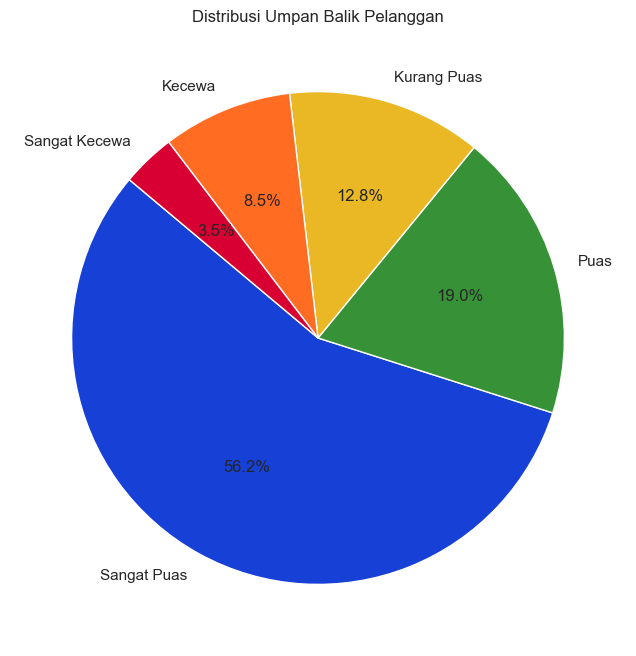

In [107]:
review_score = data_clean['review_score'].value_counts()

labels = ['Sangat Puas', 'Puas', 'Kurang Puas', 'Kecewa', 'Sangat Kecewa']
colors = ['#1640D6', '#379237', '#E9B824', '#FF6C22', '#D80032']
sizes = review_score.values

plt.figure(figsize=(8, 8))
plt.pie(x=sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Umpan Balik Pelanggan')

plt.show()

**Observasi:**  
Visualisasi ini memberikan gambaran yang jelas tentang tingkat kepuasan pelanggan. Mayoritas pelanggan menyatakan **Sangat Puas** dengan persentase sebanyak 56.2%. kemudian dilanjut dengan pelanggan yang menyatakan **Puas** dengan persentase sebanyak 19%. Meskipun ada sebagian besar respon positif, kita juga melihat bahwa sekitar 12.8% pelanggan merasa **Kurang Puas**, sementara pelanggan yang merasa **Kecewa** dan **Sangat Kecewa** jika dijumlahkan sebanyak 11%, walaupun mayoritas pelanggan merasa puas, masih perlu perhatian terhadap aspek-aspek yang membuat sebagian pelanggan merasa kurang puas atau kecewa.

##### Pertanyaan 2:

Bagaimana distribusi status pesanan pelanggan, seperti pesanan yang sedang diproses, pesanan dalam pengiriman, pesanan yang telah selesai, hingga pesanan yang mengalami pembatalan?

In [108]:
data_clean['order_status'].value_counts()

order_status
delivered      91598
shipped          953
canceled         448
invoiced         293
processing       280
unavailable        5
approved           3
Name: count, dtype: int64

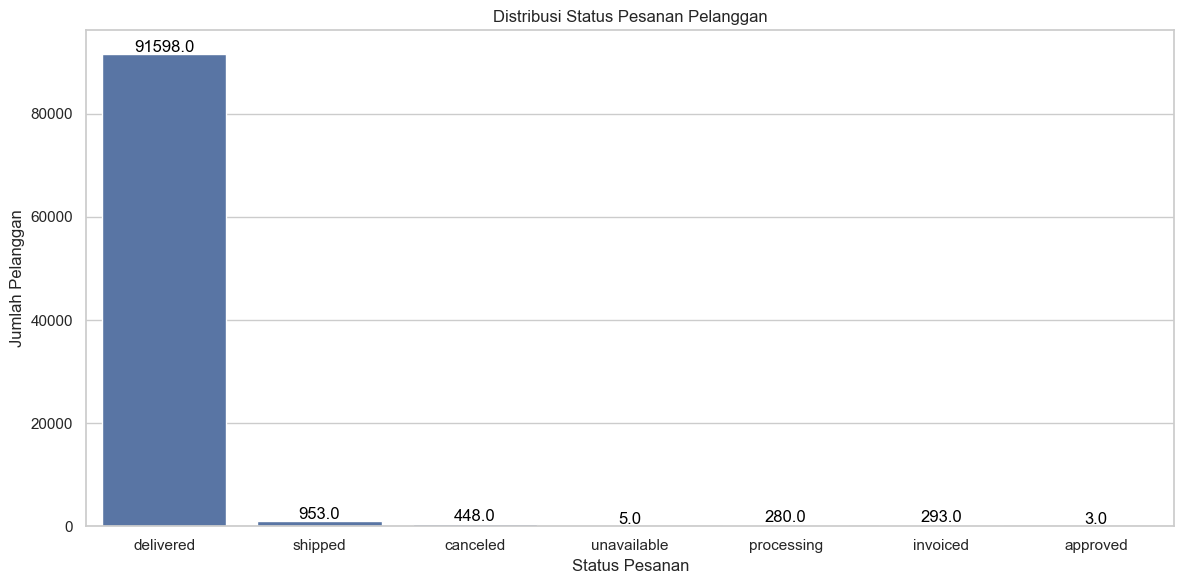

In [109]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=data_clean, x='order_status', orient='h')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Status Pesanan Pelanggan')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()

plt.show()

**Observasi:**  
Terdapat status proses pesanan sebagai berikut:
- Jumlah pesanan yang **delivered** sebanyak 91598
- Jumlah pesanan yang **shipped** sebanyak 953
- Jumlah pesanan yang **canceled** sebanyak 448
- Jumlah pesanan yang **unavailable** sebanyak 5
- Jumlah pesanan yang **processing** sebanyak 280
- Jumlah pesanan yang **invoiced** sebanyak 293
- Jumlah pesanan yang **approved** sebanyak 3

Namun, fokus perlu kita perhatikan kepada pelanggan yang melakukan **canceled** dengan jumlah sebanyak 448 pesanan dibatalkan. sehingga perlu strategi khusus untuk menurunkan pembatalan pesanan tersebut.

### Multivariate Analysis

##### Pertanyaan 3:

Produk apa saja yang memiliki penjualan terbanyak dan rating terbaik?

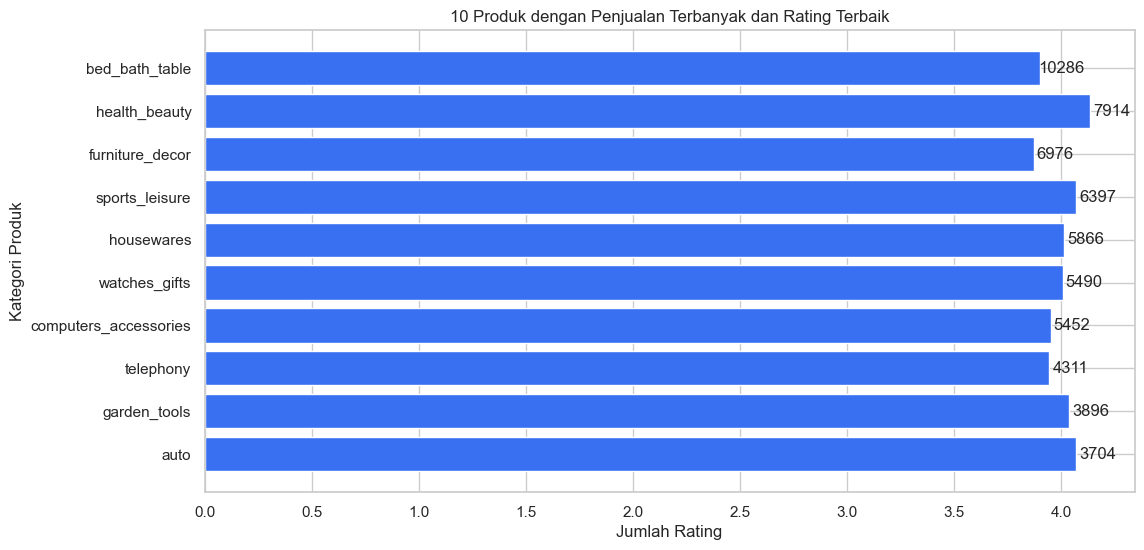

In [110]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

bars = plt.barh(best_product['product_category_name_english'],
                best_product['review_score'],
                color='#3970F1'
               )

for bar, order_count in zip(bars, best_product['order_id']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, str(order_count), ha='center', va='center')

plt.xlabel('Jumlah Rating')
plt.ylabel('Kategori Produk')
plt.title('10 Produk dengan Penjualan Terbanyak dan Rating Terbaik')

plt.gca().invert_yaxis()
plt.show()

**Observasi:**  
Terdapat Sumbu Y yang menunjukkan kolom 'product_category_name_english' dan sumbu X yang menunjukkan kolom 'review_score' yang menggambarkan Rating/Umpan Balik dari pelanggan.

Berdasarkan data visualisasi terlihat bahwa produk dengan rating tertinggi terdapat pada produk **healty_beuty** dan **auto** dengan rating 4 sekian. tetapi untuk produk yang memiliki penjualan terbanyak ialah produk **bed_bath_table** dengan penjualan sebanyak 10286 dan memiliki rating 3.9.

##### Pertanyaan 4: 

Kota mana saja yang memiliki penjualan terbanyak?

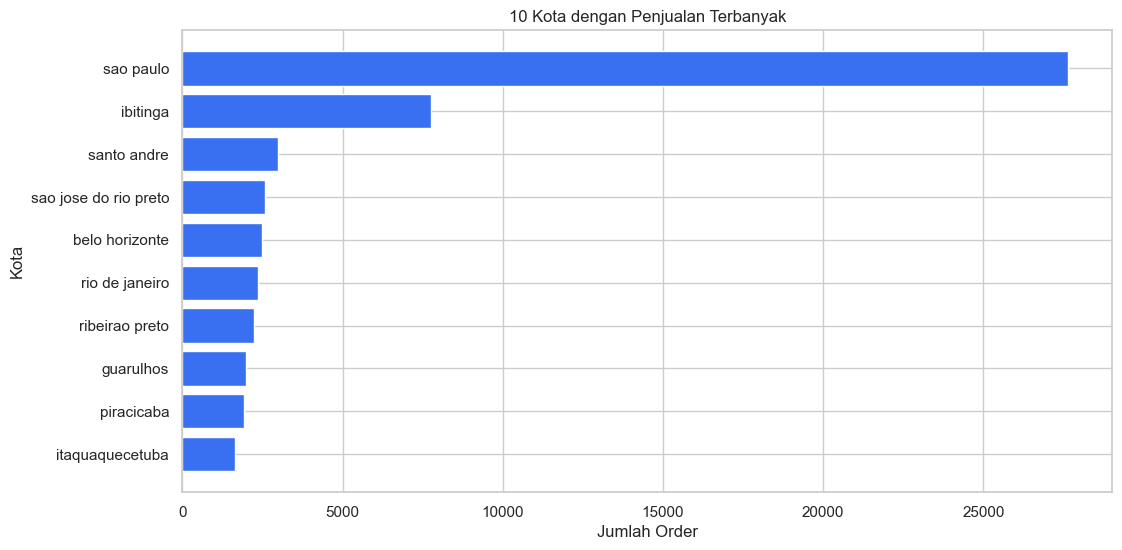

In [111]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

plt.barh(best_seller['seller_city'],
         best_seller['order_id'],
         color='#3970F1'
         )

plt.xlabel('Jumlah Order')
plt.ylabel('Kota')
plt.title('10 Kota dengan Penjualan Terbanyak')

plt.gca().invert_yaxis()
plt.show()

**Observasi:**  
Terdapat Sumbu Y yang menunjukkan kolom 'seller_city' dan sumbu X yang menunjukkan kolom 'order_id' yang menggambarkan jumlah penjualan.

Berdasarkan data visualisasi terlihat bahwa kota dengan penjualan terbanyak terdapat pada kota **sao paulo** dengan penjualan sebanyak 25000 sekian. Jika kita lihat bahwa distribusi penjualan mengalami perbedaan yang signifikan sehingga perlu strategi khusus untuk meningkatkan penjualan untuk kota-kota yang lain.

## Conclusion

Saya akan memberikan beberapa rekomendasi atau solusi yang dapat digunakan oleh stakeholder 

Solusi Pertanyaan 1: 
- Stakeholder dapat meningkatkan kualitas produk atau layanan. seperti Melakukan riset pasar untuk mengetahui kebutuhan dan keinginan pelanggan, serta melakukan inovasi produk atau layanan secara berkala.
- stakeholder dapat meningkatkan komunikasi dengan pelanggan. seperti Meningkatkan kemudahan dalam menyampaikan keluhan kepada pelanggan, atau meningkatkan responsivitas terhadap keluhan pelanggan.

Solusi Pertanyaan 2:
- Mengumpulkan umpan balik dari pelanggan yang membatalkan pesanan. Mungkin dengan menyelenggarakan survei singkat atau menghubungi mereka langsung. Ini dapat memberikan insight langsung dan membantu meningkatkan proses pelayanan.
- Pastikan proses pengiriman berjalan lancar dan sesuai dengan harapan pelanggan. Informasi pelacakan yang akurat dan pengiriman tepat waktu dapat mengurangi kemungkinan pembatalan.

Solusi Pertanyaan 3:
- Meskipun produk kategori "health_beauty" dan "auto" memiliki rating tertinggi, perhatikan untuk tetap mempertahankan dan meningkatkan kualitas produk dalam kategori tersebut. Ini dapat menciptakan kepuasan pelanggan yang lebih besar dan membangun reputasi positif.
- Mengidentifikasi faktor-faktor yang menyebabkan rating menurun dan perbaiki masalah tersebut. Hal ini dapat membantu meningkatkan kepuasan pelanggan dan meningkatkan rating produk.
- Tinjau kembali strategi persediaan dan permintaan untuk memastikan bahwa produk dengan rating tinggi memiliki ketersediaan yang memadai. Jika ada kekurangan stok, ini dapat menyebabkan penurunan kepuasan pelanggan.

Solusi Pertanyaan 4:
- Lakukan analisis pasar untuk masing-masing kota dengan penjualan rendah. Pahami karakteristik demografis, preferensi pelanggan, dan tren pasar di setiap kota untuk merancang strategi yang sesuai.
- Sesuaikan penawaran produk dengan kebutuhan pelanggan. Produk atau layanan yang populer di Sao Paulo mungkin tidak sepopuler di kota lain, jadi perlu adaptasi.

## Teknik Analisis Lanjutan

##### Unsupervised = Metode Clustering

In [112]:
feature = ['price', 'review_score']
X = data_clean[feature].values

In [113]:
data_clean[feature].describe()

,price,review_score
count,93580.000000,93580.000000
mean,115.860476,4.023146
std,178.711452,1.391744
min,0.850000,1.000000
25%,39.000000,4.000000
50%,69.900000,5.000000
75%,129.900000,5.000000
max,6735.000000,5.000000


In [114]:
X_std = StandardScaler().fit_transform(X)
data_model = pd.DataFrame(data = X_std, columns = feature)

data_model.head()

,price,review_score
0,-0.587265,0.701896
1,0.853445,-0.016631
2,-0.605507,0.701896
3,0.853445,-0.735158
4,-0.553859,-0.016631


In [115]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_model.values)
    inertia.append(kmeans.inertia_)

kmeans

c:\Users\Siswantoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Siswantoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Siswantoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Siswantoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Siswantoro\AppData\Local\Programs\Python\Python312\Lib\site-p

KMeans(n_clusters=10, random_state=0)

<Axes: >

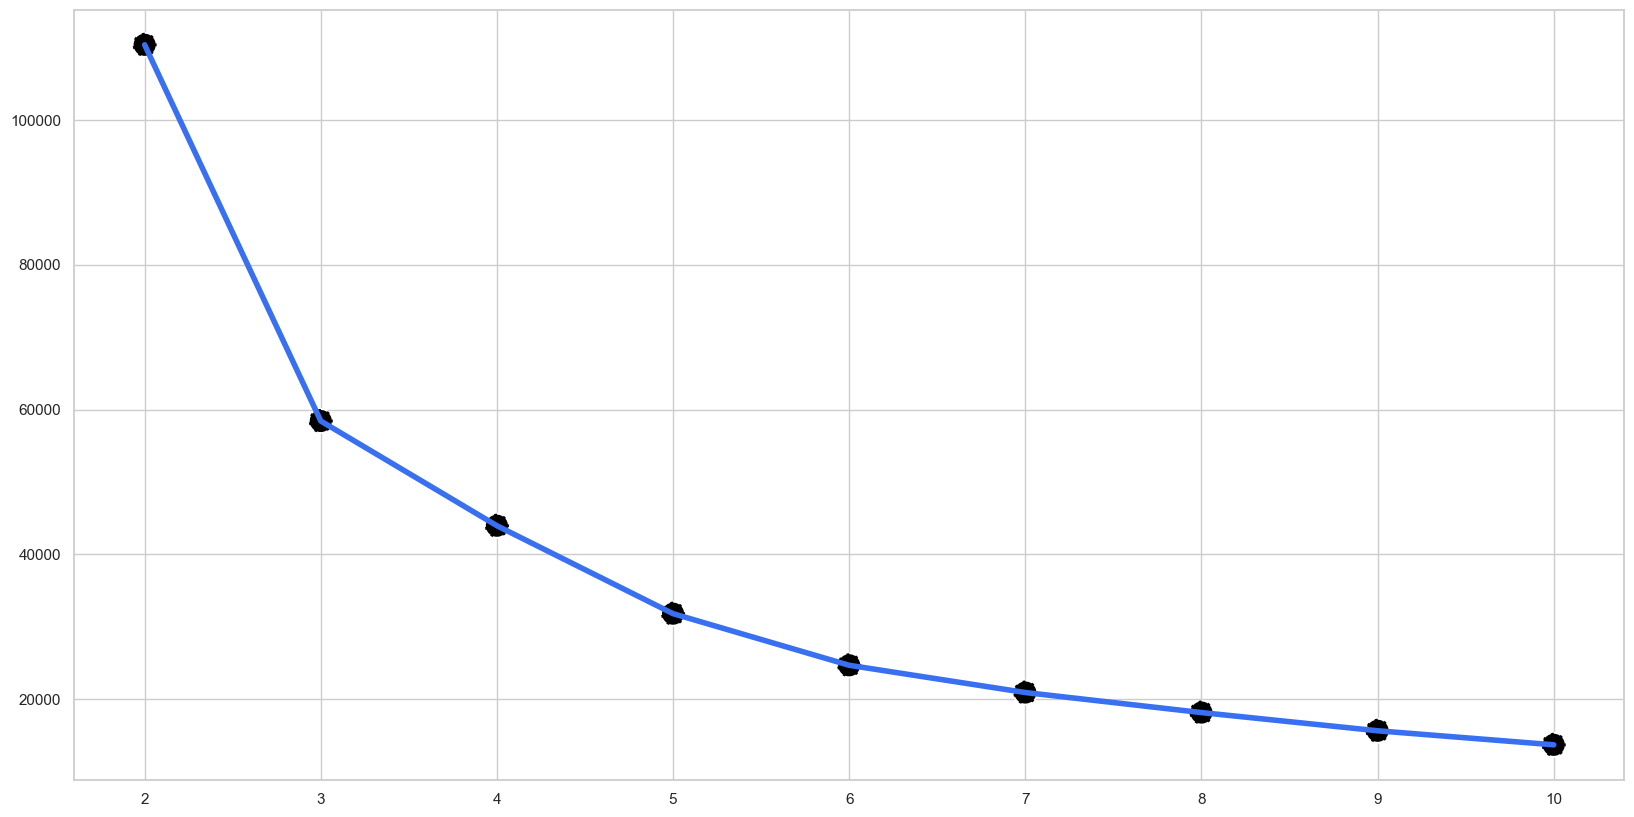

In [116]:
plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#3970F1', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='black',  linestyle='--')